**Assignment 4:** Build a Simple ANN on MNIST.

*Explanation:* Create a dense neural network using **TensorFlow**/ **PyTorch**.

  -> With TensorFlow Sequential API,

  -> With TensorFlow Functional API and
  
  -> With PyTorch for digit classification.


In [4]:
# !pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:
# Load MNIST dataset from TensorFlow's built-in datasets
# It contains 60,000 training images and 10,000 testing images of handwritten digits (0–9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check the shape of data
print(f"Training data shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels: {y_test.shape}")


Training data shape: (60000, 28, 28), Labels: (60000,)
Test data shape: (10000, 28, 28), Labels: (10000,)


In [ ]:
# Normalize pixel values to the range [0, 1]
# Original pixel values range from 0 to 255
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert integer labels into one-hot encoded format
# For example: 3 => [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [ ]:
# Build a simple feedforward neural network using Sequential API

model = Sequential()

# Step 1: Flatten the 28x28 input images into a 1D vector of 784
model.add(Flatten(input_shape=(28, 28)))

# Step 2: First hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Step 3: Second hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

# Step 4: Output layer with 10 neurons (for 10 classes), using softmax to get probabilities
model.add(Dense(10, activation='softmax'))

# Summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model with:
# - Adam optimizer (adaptive learning rate)
# - Categorical crossentropy loss function (used for multi-class classification)
# - Accuracy as evaluation metric
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model for 5 epochs with validation on test data
history = model.fit(x_train, y_train_cat,
                    epochs=5,
                    validation_data=(x_test, y_test_cat),
                    batch_size=32)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8726 - loss: 0.4365 - val_accuracy: 0.9650 - val_loss: 0.1197
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9686 - loss: 0.1061 - val_accuracy: 0.9705 - val_loss: 0.1006
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9786 - loss: 0.0705 - val_accuracy: 0.9733 - val_loss: 0.0859
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9843 - loss: 0.0529 - val_accuracy: 0.9743 - val_loss: 0.0839
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9856 - loss: 0.0448 - val_accuracy: 0.9776 - val_loss: 0.0785


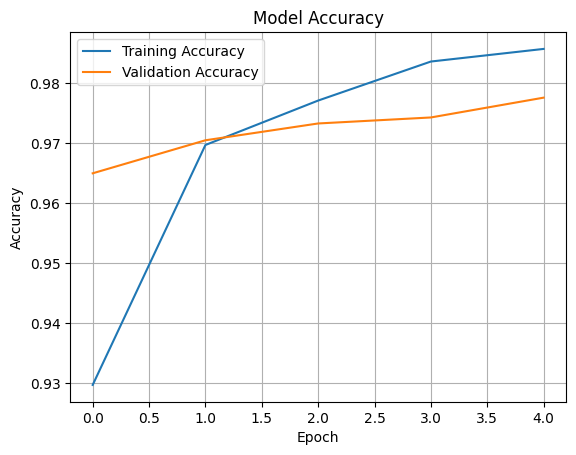

In [ ]:
# Plot accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluate the model on unseen test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9744 - loss: 0.0926
Test Accuracy: 0.9776
Test Loss: 0.0785


**TensorFlow Sequential API model building**

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8749 - loss: 0.4257 - val_accuracy: 0.9662 - val_loss: 0.1133
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9661 - loss: 0.1102 - val_accuracy: 0.9700 - val_loss: 0.0930
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9781 - loss: 0.0685 - val_accuracy: 0.9740 - val_loss: 0.0848
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9830 - loss: 0.0536 - val_accuracy: 0.9752 - val_loss: 0.0811
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9873 - loss: 0.0387 - val_accuracy: 0.9777 - val_loss: 0.0759


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9718 - loss: 0.0942

✅ Final Test Accuracy: 0.9777
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


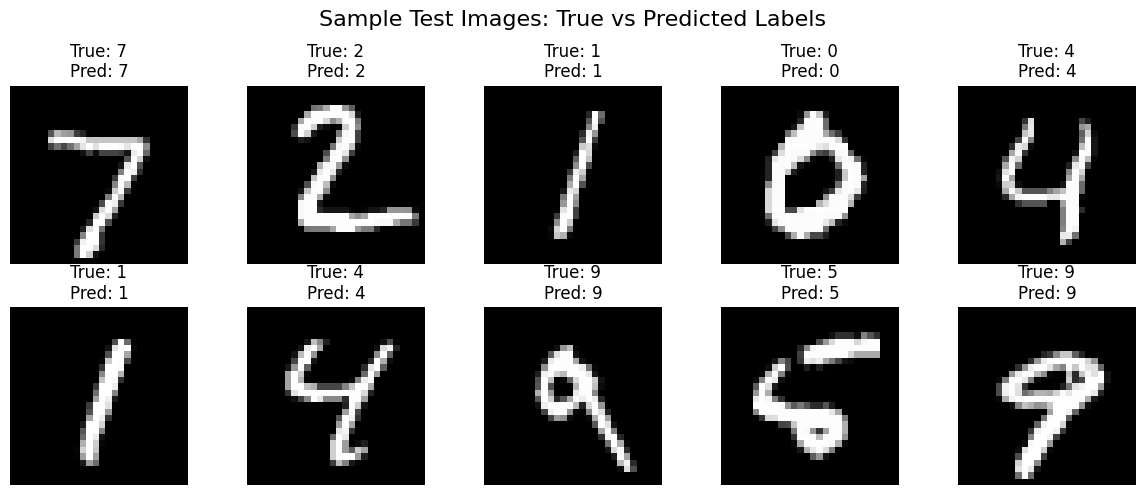

In [ ]:
# Install TensorFlow (if needed)
# !pip install tensorflow

# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset (60K train + 10K test images of handwritten digits 0–9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize image pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels for 10 output classes
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build a Sequential ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),         # Input layer: 28x28 → 784
    Dense(128, activation='relu'),         # First hidden layer
    Dense(64, activation='relu'),          # Second hidden layer
    Dense(10, activation='softmax')        # Output layer (10 classes with probabilities)
])

# Compile the model with loss function, optimizer, and metric
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model for 5 epochs with validation
history = model.fit(x_train, y_train_cat,
                    epochs=5,
                    batch_size=32,
                    validation_data=(x_test, y_test_cat))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f}")

# Predict labels on test data
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize sample predictions (first 10 images)
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.suptitle("Sample Test Images: True vs Predicted Labels", fontsize=16)
plt.tight_layout()
plt.show()


**TensorFlow Functional API model building**

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8768 - loss: 0.4261 - val_accuracy: 0.9625 - val_loss: 0.1234
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9682 - loss: 0.1056 - val_accuracy: 0.9686 - val_loss: 0.0980
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9781 - loss: 0.0701 - val_accuracy: 0.9725 - val_loss: 0.0872
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9835 - loss: 0.0515 - val_accuracy: 0.9771 - val_loss: 0.0772
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9872 - loss: 0.0409 - val_accuracy: 0.9756 - val_loss: 0.0832


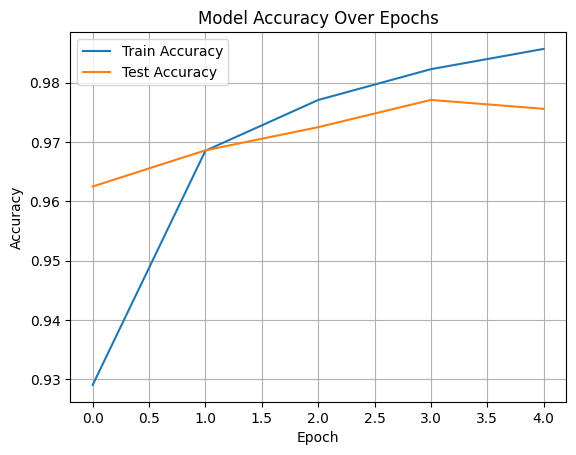

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.0969

✅ Final Test Accuracy: 0.9756
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


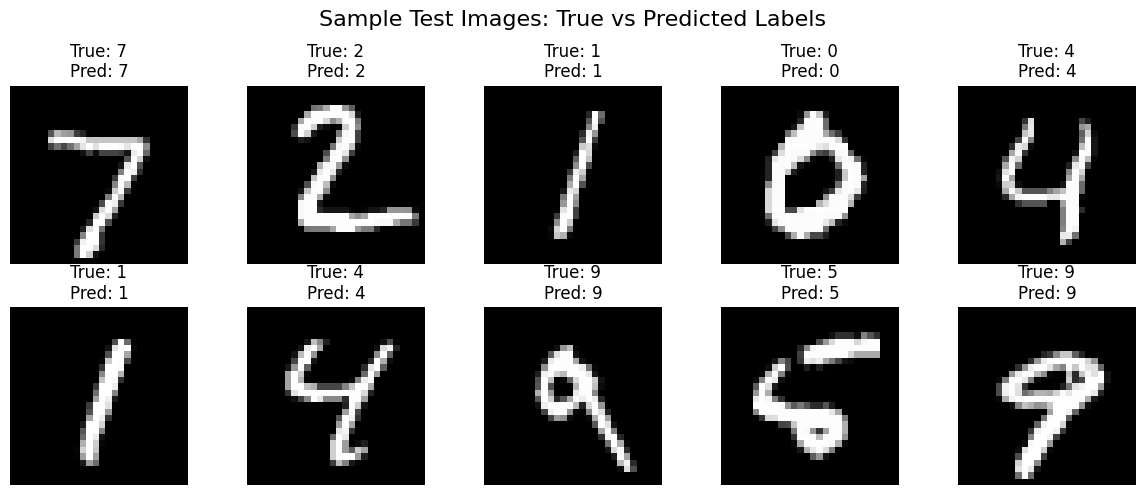

In [ ]:
# Install TensorFlow (if needed)
# !pip install tensorflow

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset (60K training, 10K test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels (e.g., 3 → [0 0 0 1 0 0 0 0 0 0])
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Functional API model building
inputs = Input(shape=(28, 28))              # Input layer for 28x28 image
x = Flatten()(inputs)                       # Flatten 2D input to 1D vector (784)
x = Dense(128, activation='relu')(x)        # First hidden layer with 128 neurons
x = Dense(64, activation='relu')(x)         # Second hidden layer with 64 neurons
outputs = Dense(10, activation='softmax')(x)  # Output layer with 10 classes

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()

# Train the model for 5 epochs
history = model.fit(x_train, y_train_cat,
                    epochs=5,
                    batch_size=32,
                    validation_data=(x_test, y_test_cat))

# Plot accuracy vs. epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on test dataset
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f}")

# Make predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Display first 10 test images with true and predicted labels
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.suptitle("Sample Test Images: True vs Predicted Labels", fontsize=16)
plt.tight_layout()
plt.show()


**PyTorch**

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 338kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.15MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.13MB/s]


Epoch 1, Loss: 317.7927
Epoch 2, Loss: 133.2584
Epoch 3, Loss: 91.0849
Epoch 4, Loss: 68.0715
Epoch 5, Loss: 53.7048

✅ Test Accuracy: 97.52%


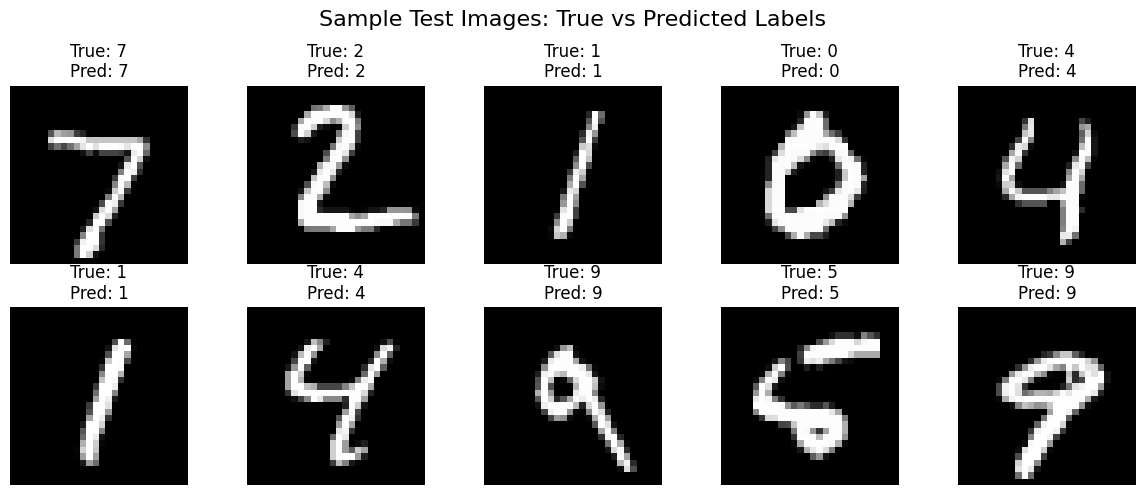

In [ ]:
# Install PyTorch if not already available
# !pip install torch torchvision

# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformation: convert image to tensor and normalize to [0, 1]
transform = transforms.Compose([transforms.ToTensor()])

# Load MNIST training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000)

# Define a simple feedforward ANN model
class SimpleANN(nn.Module):
    def __init__(self):
        super(SimpleANN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)   # Flattened input to 128 neurons
        self.fc2 = nn.Linear(128, 64)      # Hidden layer with 64 neurons
        self.fc3 = nn.Linear(64, 10)       # Output layer for 10 digit classes

    def forward(self, x):
        x = x.view(-1, 28*28)              # Flatten the 28x28 image
        x = F.relu(self.fc1(x))            # Apply ReLU after first layer
        x = F.relu(self.fc2(x))            # Apply ReLU after second layer
        x = self.fc3(x)                    # Final output layer (logits)
        return x

# Instantiate model, loss function, and optimizer
model = SimpleANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(5):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}")

# Evaluate on test data
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(f"\n✅ Test Accuracy: {100 * correct / total:.2f}%")

# Show first 10 test images with predictions
plt.figure(figsize=(12, 5))
images, labels = next(iter(test_loader))
images = images[:10]
labels = labels[:10]
outputs = model(images.to(device))
_, preds = torch.max(outputs, 1)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"True: {labels[i]}\nPred: {preds[i].item()}")
    plt.axis('off')
plt.suptitle("Sample Test Images: True vs Predicted Labels", fontsize=16)
plt.tight_layout()
plt.show()
